In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch
from py_files.ecg_sim_functions import gaussian_function
from neurodsp.utils import set_random_seed
from neurodsp.sim import sim_powerlaw

# Digital Twin

Take real parameters from one subject ECG, copy that into a new signal but slightly tweak certain parameters

In [ ]:
ecg_feats = pd.read_csv("real_ecg_features/224_ecg_output_data.csv")

ecg_feats

,cycle,r_squared,p_center,p_height,p_width,p_fwhm,p_rise_time,p_decay_time,p_rise_decay_symmetry,p_sharpness,...,t_on,t_off,pr_interval,pr_segment,qrs_duration,st_segment,qt_interval,p_duration,pp_interval,rr_interval
0,0,0.993030,1767.528779,4534.625009,16.816572,48.0,21.0,27.0,0.437500,0.013052,...,2087.0,2173.0,118.0,71.0,87.0,220.0,307.0,47.0,NaN,NaN
1,1,0.990877,2574.698644,5552.289386,18.685080,54.0,22.0,32.0,0.407407,0.009743,...,2890.0,2978.0,124.0,70.0,81.0,220.0,301.0,54.0,807.0,806.0
2,2,0.990164,4860.698644,4303.717822,18.685080,50.0,22.0,28.0,0.440000,0.008882,...,5173.0,5257.0,115.0,65.0,86.0,217.0,303.0,50.0,2286.0,2281.0
3,3,0.992782,5640.613711,4401.083758,16.464745,46.0,21.0,25.0,0.456522,0.010899,...,5946.0,6039.0,114.0,68.0,84.0,221.0,305.0,46.0,780.0,780.0
4,4,0.986688,7899.698644,5139.906758,18.685080,55.0,22.0,33.0,0.400000,0.011262,...,8212.0,8297.0,120.0,65.0,82.0,217.0,299.0,55.0,2259.0,2261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,636,0.992134,625841.386289,3916.471530,17.750826,51.0,30.0,21.0,0.588235,0.009441,...,626157.0,626242.0,118.0,67.0,85.0,228.0,313.0,51.0,935.0,924.0
637,637,0.989477,626735.131492,4513.568430,19.826636,50.0,26.0,24.0,0.520000,0.007539,...,627052.0,627140.0,117.0,67.0,84.0,230.0,314.0,50.0,894.0,897.0
638,638,0.987262,627566.726017,3683.572735,14.013810,49.0,33.0,16.0,0.673469,0.018815,...,627877.0,627961.0,114.0,65.0,88.0,225.0,313.0,49.0,831.0,824.0
639,639,0.984085,628361.273983,3081.193789,14.013810,46.0,16.0,30.0,0.347826,0.019831,...,628689.0,628774.0,113.0,67.0,90.0,226.0,316.0,46.0,792.0,812.0


In [ ]:
ecg_feats_dropna = ecg_feats.dropna(axis=0)
ecg_feats_dropna

,cycle,r_squared,p_center,p_height,p_width,p_fwhm,p_rise_time,p_decay_time,p_rise_decay_symmetry,p_sharpness,...,t_on,t_off,pr_interval,pr_segment,qrs_duration,st_segment,qt_interval,p_duration,pp_interval,rr_interval
1,1,0.990877,2574.698644,5552.289386,18.685080,54.0,22.0,32.0,0.407407,0.009743,...,2890.0,2978.0,124.0,70.0,81.0,220.0,301.0,54.0,807.0,806.0
2,2,0.990164,4860.698644,4303.717822,18.685080,50.0,22.0,28.0,0.440000,0.008882,...,5173.0,5257.0,115.0,65.0,86.0,217.0,303.0,50.0,2286.0,2281.0
3,3,0.992782,5640.613711,4401.083758,16.464745,46.0,21.0,25.0,0.456522,0.010899,...,5946.0,6039.0,114.0,68.0,84.0,221.0,305.0,46.0,780.0,780.0
4,4,0.986688,7899.698644,5139.906758,18.685080,55.0,22.0,33.0,0.400000,0.011262,...,8212.0,8297.0,120.0,65.0,82.0,217.0,299.0,55.0,2259.0,2261.0
5,5,0.989172,8727.104118,2463.392391,12.145302,40.0,14.0,26.0,0.350000,0.028766,...,9045.0,9130.0,108.0,68.0,91.0,218.0,309.0,40.0,828.0,831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,636,0.992134,625841.386289,3916.471530,17.750826,51.0,30.0,21.0,0.588235,0.009441,...,626157.0,626242.0,118.0,67.0,85.0,228.0,313.0,51.0,935.0,924.0
637,637,0.989477,626735.131492,4513.568430,19.826636,50.0,26.0,24.0,0.520000,0.007539,...,627052.0,627140.0,117.0,67.0,84.0,230.0,314.0,50.0,894.0,897.0
638,638,0.987262,627566.726017,3683.572735,14.013810,49.0,33.0,16.0,0.673469,0.018815,...,627877.0,627961.0,114.0,65.0,88.0,225.0,313.0,49.0,831.0,824.0
639,639,0.984085,628361.273983,3081.193789,14.013810,46.0,16.0,30.0,0.347826,0.019831,...,628689.0,628774.0,113.0,67.0,90.0,226.0,316.0,46.0,792.0,812.0


## Recreate the full original signal

In [ ]:
# Get the minimum and maximum center values across all rows and Gaussians
min_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].min().min()
max_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].max().max()

# Generate xs for the full range of the ECG signal (over the full data range)
full_xs = np.arange(min_x - 200, max_x + 200, 1)  # Add some buffer before and after

# Initialize the full signal array with zeros
full_signal = np.zeros_like(full_xs)

# Loop through each row of the dataframe
for row in ecg_feats_dropna['cycle']:
    # Extract the Gaussian parameters for the current row
    p_center, p_height, p_width = ecg_feats_dropna['p_center'][row], ecg_feats_dropna['p_height'][row], ecg_feats_dropna['p_width'][row]
    q_center, q_height, q_width = ecg_feats_dropna['q_center'][row], ecg_feats_dropna['q_height'][row], ecg_feats_dropna['q_width'][row]
    r_center, r_height, r_width = ecg_feats_dropna['r_center'][row], ecg_feats_dropna['r_height'][row], ecg_feats_dropna['r_width'][row]
    s_center, s_height, s_width = ecg_feats_dropna['s_center'][row], ecg_feats_dropna['s_height'][row], ecg_feats_dropna['s_width'][row]
    t_center, t_height, t_width = ecg_feats_dropna['t_center'][row], ecg_feats_dropna['t_height'][row], ecg_feats_dropna['t_width'][row]

    # Set the window around the current row's cycle to limit the xs range for the current cycle
    cycle_min_x = min([p_center, q_center, r_center, s_center, t_center]) - 200
    cycle_max_x = max([p_center, q_center, r_center, s_center, t_center]) + 200

    # Generate xs for the current row's cycle (only for the current range)
    xs = np.arange(cycle_min_x, cycle_max_x, 1)

    # Combine all Gaussian parameters into one array
    gaussian_params = np.array([
        p_center, p_height, p_width,
        q_center, q_height, q_width,
        r_center, r_height, r_width,
        s_center, s_height, s_width,
        t_center, t_height, t_width
    ])

    # Create the ECG cycle signal for this row
    wave = np.array([gaussian_function(xs, *gaussian_params[i:i+3]) for i in range(0, len(gaussian_params), 3)])
    one_cycle_signal = np.sum(wave, axis=0)

    # Find the corresponding indices in the full_xs array
    full_signal_indices = np.searchsorted(full_xs, xs)

    # Add this cycle's signal to the full signal at the correct indices
    full_signal[full_signal_indices] += one_cycle_signal

# Plot the full ECG signal
# %matplotlib qt
# plt.figure(figsize=(10, 6))
# plt.plot(full_xs, full_signal, color='black', linewidth=2)
# plt.title('Recreated Full ECG Signal')
# plt.xlabel('Time (samples)')
# plt.ylabel('Amplitude')
# plt.show()

In [ ]:
import matplotlib
for name, hex_code in matplotlib.colors.CSS4_COLORS.items():
    print(name, hex_code)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


## High Q
Adding 6000 to Q height

In [ ]:
# Get the minimum and maximum center values across all rows and Gaussians
min_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].min().min()
max_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].max().max()

# Generate xs for the full range of the ECG signal (over the full data range)
full_xs = np.arange(min_x - 200, max_x + 200, 1)  # Add some buffer before and after

# Initialize the full signal array with zeros
full_signal_high_q = np.zeros_like(full_xs)

# Loop through each row of the dataframe
for row in ecg_feats_dropna['cycle']:
    # Extract the Gaussian parameters for the current row
    p_center, p_height, p_width = ecg_feats_dropna['p_center'][row], ecg_feats_dropna['p_height'][row], ecg_feats_dropna['p_width'][row]
    q_center, q_height, q_width = ecg_feats_dropna['q_center'][row], ecg_feats_dropna['q_height'][row]-6000, ecg_feats_dropna['q_width'][row]
    r_center, r_height, r_width = ecg_feats_dropna['r_center'][row], ecg_feats_dropna['r_height'][row], ecg_feats_dropna['r_width'][row]
    s_center, s_height, s_width = ecg_feats_dropna['s_center'][row], ecg_feats_dropna['s_height'][row], ecg_feats_dropna['s_width'][row]
    t_center, t_height, t_width = ecg_feats_dropna['t_center'][row], ecg_feats_dropna['t_height'][row], ecg_feats_dropna['t_width'][row]

    # Set the window around the current row's cycle to limit the xs range for the current cycle
    cycle_min_x = min([p_center, q_center, r_center, s_center, t_center]) - 200
    cycle_max_x = max([p_center, q_center, r_center, s_center, t_center]) + 200

    # Generate xs for the current row's cycle (only for the current range)
    xs = np.arange(cycle_min_x, cycle_max_x, 1)

    # Combine all Gaussian parameters into one array
    gaussian_params = np.array([
        p_center, p_height, p_width,
        q_center, q_height, q_width,
        r_center, r_height, r_width,
        s_center, s_height, s_width,
        t_center, t_height, t_width
    ])

    # Create the ECG cycle signal for this row
    wave = np.array([gaussian_function(xs, *gaussian_params[i:i+3]) for i in range(0, len(gaussian_params), 3)])
    one_cycle_signal = np.sum(wave, axis=0)

    # Find the corresponding indices in the full_xs array
    full_signal_indices = np.searchsorted(full_xs, xs)

    # Add this cycle's signal to the full signal at the correct indices
    full_signal_high_q[full_signal_indices] += one_cycle_signal

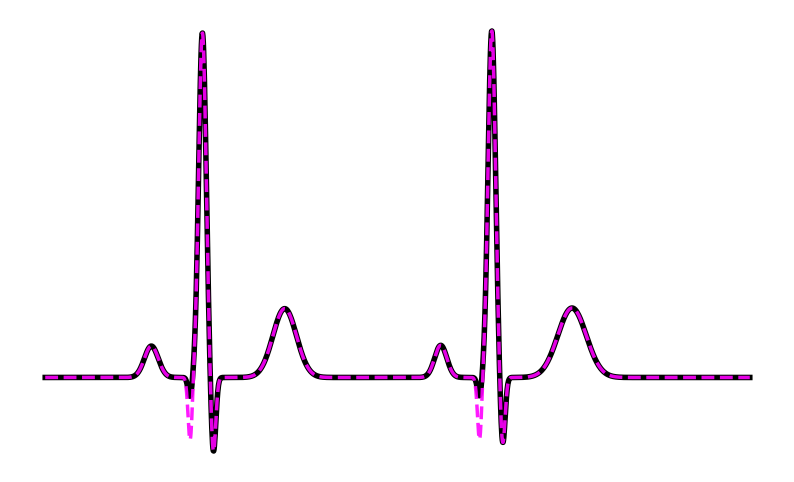

In [ ]:
%matplotlib inline
crop_start = 2200
crop_end = 4100
plt.figure(figsize=(10, 6))
plt.plot(full_xs[crop_start:crop_end], full_signal[crop_start:crop_end], color='black', label='Original ECG', linewidth=4)
plt.plot(full_xs[crop_start:crop_end], full_signal_high_q[crop_start:crop_end], color='magenta', alpha=0.9, label='Digital Twin', linewidth=2.5, linestyle='--')
plt.axis('off')
plt.show()

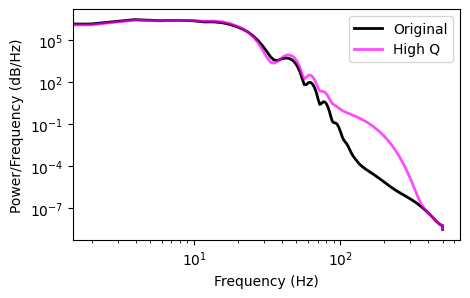

In [ ]:
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

# Calculate the Power Spectral Density (PSD) using Welch's method
freqs, psd = welch(full_signal, fs=1000, nperseg=nperseg, noverlap=noverlap)
freqs_digtwin, psd_digtwin = welch(full_signal_high_q, fs=1000, nperseg=nperseg, noverlap=noverlap)

%matplotlib inline
plt.figure(figsize=(5, 3))
plt.loglog(freqs, psd, label='Original', color = "black", linewidth=2)
plt.loglog(freqs_digtwin, psd_digtwin, label='High Q', color = "magenta", linewidth=2, alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## High R
Adding 40000 to R height

In [ ]:
# Get the minimum and maximum center values across all rows and Gaussians
min_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].min().min()
max_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].max().max()

# Generate xs for the full range of the ECG signal (over the full data range)
full_xs = np.arange(min_x - 200, max_x + 200, 1)  # Add some buffer before and after

# Initialize the full signal array with zeros
full_signal_high_r = np.zeros_like(full_xs)

# Loop through each row of the dataframe
for row in ecg_feats_dropna['cycle']:
    # Extract the Gaussian parameters for the current row
    p_center, p_height, p_width = ecg_feats_dropna['p_center'][row], ecg_feats_dropna['p_height'][row], ecg_feats_dropna['p_width'][row]
    q_center, q_height, q_width = ecg_feats_dropna['q_center'][row], ecg_feats_dropna['q_height'][row], ecg_feats_dropna['q_width'][row]
    r_center, r_height, r_width = ecg_feats_dropna['r_center'][row], ecg_feats_dropna['r_height'][row]+40000, ecg_feats_dropna['r_width'][row]
    s_center, s_height, s_width = ecg_feats_dropna['s_center'][row], ecg_feats_dropna['s_height'][row], ecg_feats_dropna['s_width'][row]
    t_center, t_height, t_width = ecg_feats_dropna['t_center'][row], ecg_feats_dropna['t_height'][row], ecg_feats_dropna['t_width'][row]

    # Set the window around the current row's cycle to limit the xs range for the current cycle
    cycle_min_x = min([p_center, q_center, r_center, s_center, t_center]) - 200
    cycle_max_x = max([p_center, q_center, r_center, s_center, t_center]) + 200

    # Generate xs for the current row's cycle (only for the current range)
    xs = np.arange(cycle_min_x, cycle_max_x, 1)

    # Combine all Gaussian parameters into one array
    gaussian_params = np.array([
        p_center, p_height, p_width,
        q_center, q_height, q_width,
        r_center, r_height, r_width,
        s_center, s_height, s_width,
        t_center, t_height, t_width
    ])

    # Create the ECG cycle signal for this row
    wave = np.array([gaussian_function(xs, *gaussian_params[i:i+3]) for i in range(0, len(gaussian_params), 3)])
    one_cycle_signal = np.sum(wave, axis=0)

    # Find the corresponding indices in the full_xs array
    full_signal_indices = np.searchsorted(full_xs, xs)

    # Add this cycle's signal to the full signal at the correct indices
    full_signal_high_r[full_signal_indices] += one_cycle_signal

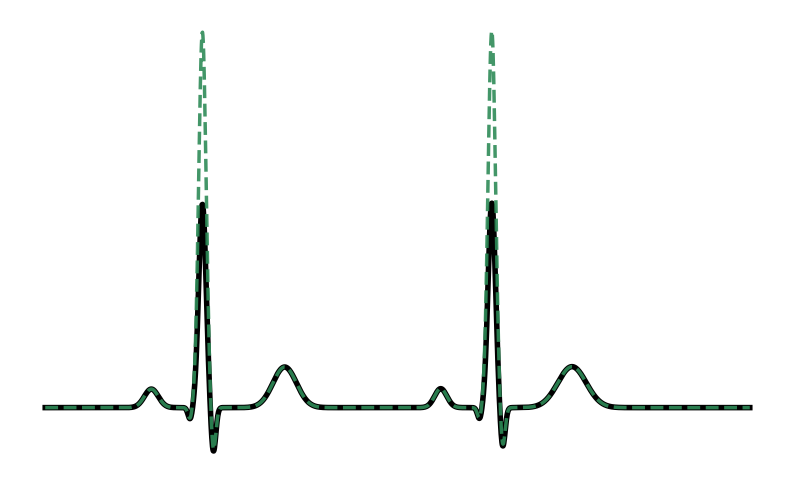

In [ ]:
%matplotlib inline
crop_start = 2200
crop_end = 4100
plt.figure(figsize=(10, 6))
plt.plot(full_xs[crop_start:crop_end], full_signal[crop_start:crop_end], color='black', label='Original ECG', linewidth=4)
plt.plot(full_xs[crop_start:crop_end], full_signal_high_r[crop_start:crop_end], color='seagreen', alpha=0.9, label='Digital Twin', linewidth=2.5, linestyle='--')
plt.axis('off')
plt.show()

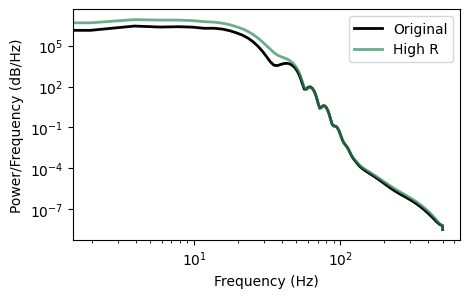

In [ ]:
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

# Calculate the Power Spectral Density (PSD) using Welch's method
freqs, psd = welch(full_signal, fs=1000, nperseg=nperseg, noverlap=noverlap)
freqs_digtwin, psd_digtwin = welch(full_signal_high_r, fs=1000, nperseg=nperseg, noverlap=noverlap)

%matplotlib inline
plt.figure(figsize=(5, 3))
plt.loglog(freqs, psd, label='Original', color = "black", linewidth=2)
plt.loglog(freqs_digtwin, psd_digtwin, label='High R', color = "seagreen", linewidth=2, alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## Wide T
Adding 30 to T width

In [ ]:
# Get the minimum and maximum center values across all rows and Gaussians
min_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].min().min()
max_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].max().max()

# Generate xs for the full range of the ECG signal (over the full data range)
full_xs = np.arange(min_x - 200, max_x + 200, 1)  # Add some buffer before and after

# Initialize the full signal array with zeros
full_signal_wide_t = np.zeros_like(full_xs)

# Loop through each row of the dataframe
for row in ecg_feats_dropna['cycle']:
    # Extract the Gaussian parameters for the current row
    p_center, p_height, p_width = ecg_feats_dropna['p_center'][row], ecg_feats_dropna['p_height'][row], ecg_feats_dropna['p_width'][row]
    q_center, q_height, q_width = ecg_feats_dropna['q_center'][row], ecg_feats_dropna['q_height'][row], ecg_feats_dropna['q_width'][row]
    r_center, r_height, r_width = ecg_feats_dropna['r_center'][row], ecg_feats_dropna['r_height'][row], ecg_feats_dropna['r_width'][row]
    s_center, s_height, s_width = ecg_feats_dropna['s_center'][row], ecg_feats_dropna['s_height'][row], ecg_feats_dropna['s_width'][row]
    t_center, t_height, t_width = ecg_feats_dropna['t_center'][row], ecg_feats_dropna['t_height'][row], ecg_feats_dropna['t_width'][row]+30

    # Set the window around the current row's cycle to limit the xs range for the current cycle
    cycle_min_x = min([p_center, q_center, r_center, s_center, t_center]) - 200
    cycle_max_x = max([p_center, q_center, r_center, s_center, t_center]) + 200

    # Generate xs for the current row's cycle (only for the current range)
    xs = np.arange(cycle_min_x, cycle_max_x, 1)

    # Combine all Gaussian parameters into one array
    gaussian_params = np.array([
        p_center, p_height, p_width,
        q_center, q_height, q_width,
        r_center, r_height, r_width,
        s_center, s_height, s_width,
        t_center, t_height, t_width
    ])

    # Create the ECG cycle signal for this row
    wave = np.array([gaussian_function(xs, *gaussian_params[i:i+3]) for i in range(0, len(gaussian_params), 3)])
    one_cycle_signal = np.sum(wave, axis=0)

    # Find the corresponding indices in the full_xs array
    full_signal_indices = np.searchsorted(full_xs, xs)

    # Add this cycle's signal to the full signal at the correct indices
    full_signal_wide_t[full_signal_indices] += one_cycle_signal

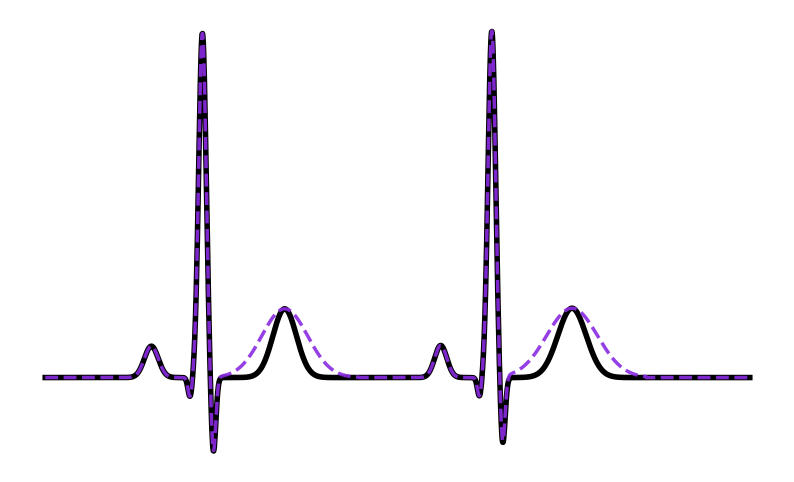

In [ ]:
%matplotlib inline
crop_start = 2200
crop_end = 4100
plt.figure(figsize=(10, 6))
plt.plot(full_xs[crop_start:crop_end], full_signal[crop_start:crop_end], color='black', label='Original ECG', linewidth=4)
plt.plot(full_xs[crop_start:crop_end], full_signal_wide_t[crop_start:crop_end], color='blueviolet', alpha=0.9, label='Digital Twin', linewidth=2.5, linestyle='--')
plt.axis('off')
plt.show()

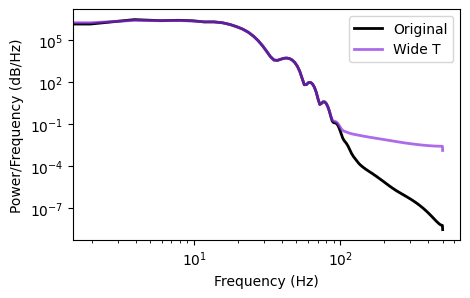

In [ ]:
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

# Calculate the Power Spectral Density (PSD) using Welch's method
freqs, psd = welch(full_signal, fs=1000, nperseg=nperseg, noverlap=noverlap)
freqs_digtwin, psd_digtwin = welch(full_signal_wide_t, fs=1000, nperseg=nperseg, noverlap=noverlap)

%matplotlib inline
plt.figure(figsize=(5, 3))
plt.loglog(freqs, psd, label='Original', color = "black", linewidth=2)
plt.loglog(freqs_digtwin, psd_digtwin, label='Wide T', color = "blueviolet", linewidth=2, alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## Wide S
Adding 20 to S width

In [ ]:
# Get the minimum and maximum center values across all rows and Gaussians
min_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].min().min()
max_x = ecg_feats_dropna[['p_center', 'q_center', 'r_center', 's_center', 't_center']].max().max()

# Generate xs for the full range of the ECG signal (over the full data range)
full_xs = np.arange(min_x - 200, max_x + 200, 1)  # Add some buffer before and after

# Initialize the full signal array with zeros
full_signal_wide_s = np.zeros_like(full_xs)

# Loop through each row of the dataframe
for row in ecg_feats_dropna['cycle']:
    # Extract the Gaussian parameters for the current row
    p_center, p_height, p_width = ecg_feats_dropna['p_center'][row], ecg_feats_dropna['p_height'][row], ecg_feats_dropna['p_width'][row]
    q_center, q_height, q_width = ecg_feats_dropna['q_center'][row], ecg_feats_dropna['q_height'][row], ecg_feats_dropna['q_width'][row]
    r_center, r_height, r_width = ecg_feats_dropna['r_center'][row], ecg_feats_dropna['r_height'][row], ecg_feats_dropna['r_width'][row]
    s_center, s_height, s_width = ecg_feats_dropna['s_center'][row], ecg_feats_dropna['s_height'][row], ecg_feats_dropna['s_width'][row]+20
    t_center, t_height, t_width = ecg_feats_dropna['t_center'][row], ecg_feats_dropna['t_height'][row], ecg_feats_dropna['t_width'][row]

    # Set the window around the current row's cycle to limit the xs range for the current cycle
    cycle_min_x = min([p_center, q_center, r_center, s_center, t_center]) - 200
    cycle_max_x = max([p_center, q_center, r_center, s_center, t_center]) + 200

    # Generate xs for the current row's cycle (only for the current range)
    xs = np.arange(cycle_min_x, cycle_max_x, 1)

    # Combine all Gaussian parameters into one array
    gaussian_params = np.array([
        p_center, p_height, p_width,
        q_center, q_height, q_width,
        r_center, r_height, r_width,
        s_center, s_height, s_width,
        t_center, t_height, t_width
    ])

    # Create the ECG cycle signal for this row
    wave = np.array([gaussian_function(xs, *gaussian_params[i:i+3]) for i in range(0, len(gaussian_params), 3)])
    one_cycle_signal = np.sum(wave, axis=0)

    # Find the corresponding indices in the full_xs array
    full_signal_indices = np.searchsorted(full_xs, xs)

    # Add this cycle's signal to the full signal at the correct indices
    full_signal_wide_s[full_signal_indices] += one_cycle_signal

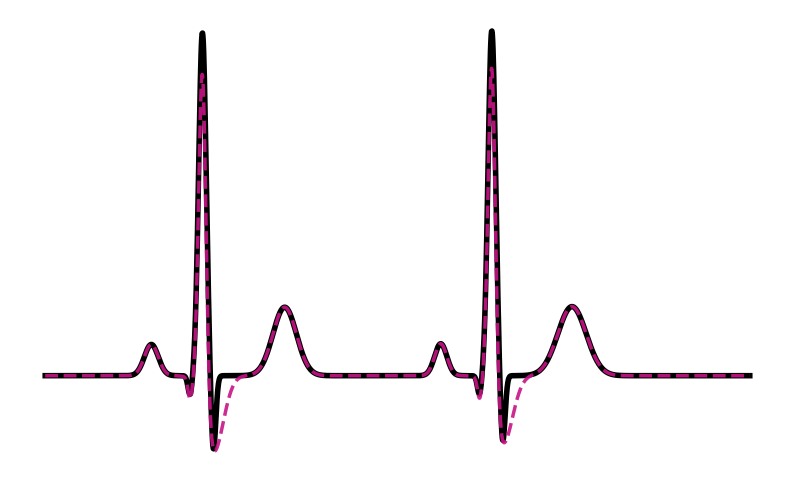

In [ ]:
%matplotlib inline
crop_start = 2200
crop_end = 4100
plt.figure(figsize=(10, 6))
plt.plot(full_xs[crop_start:crop_end], full_signal[crop_start:crop_end], color='black', label='Original ECG', linewidth=4)
plt.plot(full_xs[crop_start:crop_end], full_signal_wide_s[crop_start:crop_end], color='mediumvioletred', alpha=0.9, label='Digital Twin', linewidth=2.5, linestyle='--')
plt.axis('off')
plt.show()

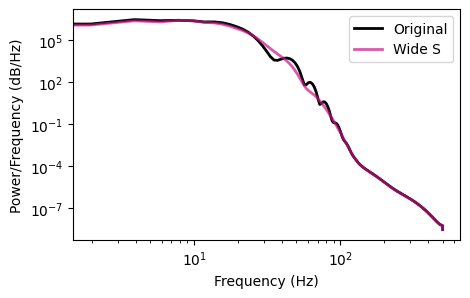

In [ ]:
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

# Calculate the Power Spectral Density (PSD) using Welch's method
freqs, psd = welch(full_signal, fs=1000, nperseg=nperseg, noverlap=noverlap)
freqs_digtwin, psd_digtwin = welch(full_signal_wide_s, fs=1000, nperseg=nperseg, noverlap=noverlap)

%matplotlib inline
plt.figure(figsize=(5, 3))
plt.loglog(freqs, psd, label='Original', color = "black", linewidth=2)
plt.loglog(freqs_digtwin, psd_digtwin, label='Wide S', color = "mediumvioletred", linewidth=2, alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

# Combine digital twin ECGs with simulated aperiodic neural activity

## Aperiodic EEG

In [ ]:
# Set the random seed, for consistency simulating data
set_random_seed(1)

# Set some general settings, to be used across all simulations
fs = 1000
n_seconds = len(full_signal)/fs

# Set the exponent for brown noise, which is -2
exponent = -1.8

# Simulate powerlaw activity
br_noise = sim_powerlaw(n_seconds, fs, exponent)

In [ ]:
# Find the maximum amplitude of br_noise_norm
max_amplitude_br_noise = np.max(np.abs(br_noise))

# Define the scaling factor to make poisson_sig_norm 10% of max_amplitude_br_noise
scaling_factor = (0.1 * max_amplitude_br_noise) / np.max(full_signal)

# Scale down the poisson_sig_norm
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_ecg = full_signal * scaling_factor

# Superimpose the signals by adding them together
ecg_eeg_original = br_noise + scaled_ecg

In [ ]:
# Find the maximum amplitude of br_noise_norm
max_amplitude_br_noise = np.max(np.abs(br_noise))

# Define the scaling factor to make poisson_sig_norm 10% of max_amplitude_br_noise
scaling_factor = (0.1 * max_amplitude_br_noise) / np.max(full_signal)


## High R

In [ ]:
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_ecg = full_signal_high_r * scaling_factor

# Superimpose the signals by adding them together
ecg_eeg_high_r = br_noise + scaled_ecg

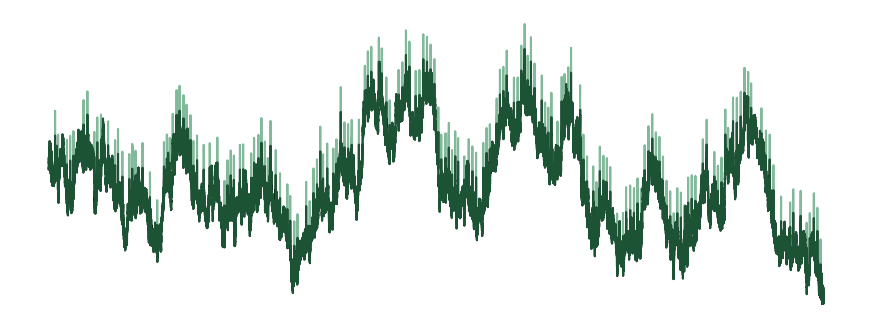

In [ ]:
crop_start = 1000
crop_end = 200000

time = np.arange(0, len(ecg_eeg_original))

plt.figure(figsize=(11, 4))
# Plot EEG signal with cardiac artifacts
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_original[crop_start:crop_end], color='black', label='EEG + Original ECG')
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_high_r[crop_start:crop_end], color='seagreen', label='EEG + High R ECG', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axis('off')
plt.show()

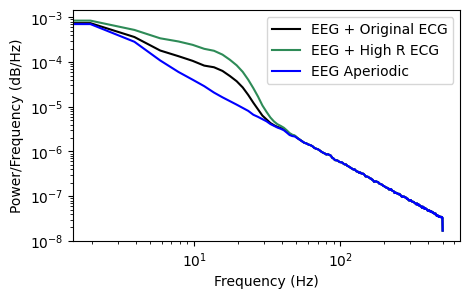

In [ ]:
freq_eeg_only, psd_eeg_only = welch(br_noise, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_original, psd_original = welch(ecg_eeg_original, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_high_r, psd_high_r = welch(ecg_eeg_high_r, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(5, 3))

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(freq_original, psd_original, label='EEG + Original ECG', color='black' )
plt.loglog(freq_high_r, psd_high_r, label='EEG + High R ECG', color = 'seagreen')
plt.loglog(freq_eeg_only, psd_eeg_only, label='EEG Aperiodic', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## High Q

In [ ]:
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_ecg = full_signal_high_q * scaling_factor

# Superimpose the signals by adding them together
ecg_eeg_high_q = br_noise + scaled_ecg

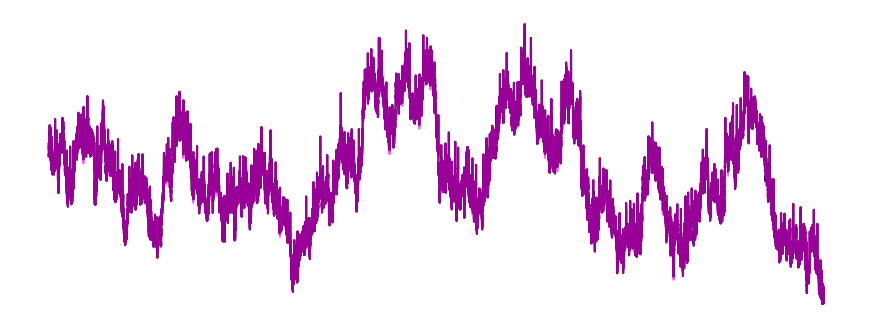

In [ ]:
crop_start = 1000
crop_end = 200000

time = np.arange(0, len(ecg_eeg_original))

plt.figure(figsize=(11, 4))
# Plot EEG signal with cardiac artifacts
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_original[crop_start:crop_end], color='black', label='EEG + Original ECG')
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_high_q[crop_start:crop_end], color='magenta', label='EEG + High Q ECG', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axis('off')
plt.show()

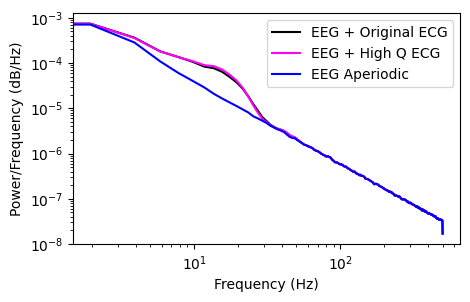

In [ ]:
freq_eeg_only, psd_eeg_only = welch(br_noise, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_original, psd_original = welch(ecg_eeg_original, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_high_q, psd_high_q = welch(ecg_eeg_high_q, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(5, 3))

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(freq_original, psd_original, label='EEG + Original ECG', color='black' )
plt.loglog(freq_high_q, psd_high_q, label='EEG + High Q ECG', color = 'magenta')
plt.loglog(freq_eeg_only, psd_eeg_only, label='EEG Aperiodic', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## Wide T

In [ ]:
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_ecg = full_signal_wide_t * scaling_factor

# Superimpose the signals by adding them together
ecg_eeg_wide_t = br_noise + scaled_ecg

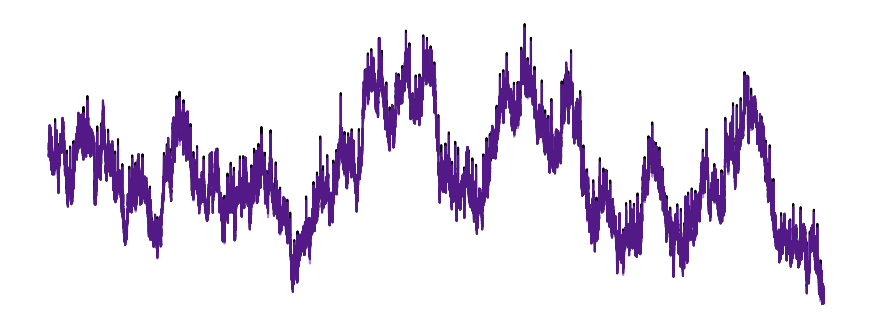

In [ ]:
crop_start = 1000
crop_end = 200000

time = np.arange(0, len(ecg_eeg_original))

plt.figure(figsize=(11, 4))
# Plot EEG signal with cardiac artifacts
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_original[crop_start:crop_end], color='black', label='EEG + Original ECG')
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_wide_t[crop_start:crop_end], color='blueviolet', label='EEG + Wide T ECG', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axis('off')
plt.show()

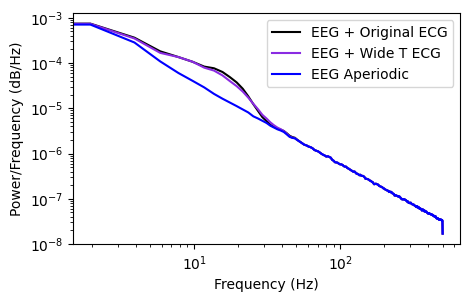

In [ ]:
freq_eeg_only, psd_eeg_only = welch(br_noise, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_original, psd_original = welch(ecg_eeg_original, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_wide_t, psd_wide_t = welch(ecg_eeg_wide_t, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(5, 3))

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(freq_original, psd_original, label='EEG + Original ECG', color='black' )
plt.loglog(freq_wide_t, psd_wide_t, label='EEG + Wide T ECG', color = 'blueviolet')
plt.loglog(freq_eeg_only, psd_eeg_only, label='EEG Aperiodic', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

## Wide S

In [ ]:
#The scaling_factor is calculated to scale down the poisson_sig_norm such that its maximum value becomes 10% of the maximum amplitude of br_noise_norm.
scaled_ecg = full_signal_wide_s * scaling_factor

# Superimpose the signals by adding them together
ecg_eeg_wide_s = br_noise + scaled_ecg

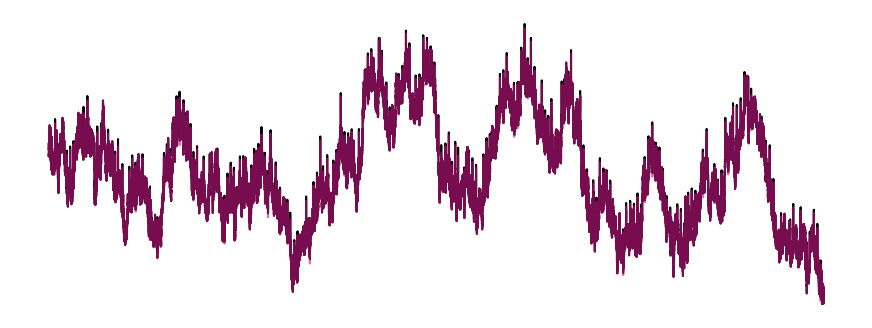

: 

In [ ]:
crop_start = 1000
crop_end = 200000

time = np.arange(0, len(ecg_eeg_original))

plt.figure(figsize=(11, 4))
# Plot EEG signal with cardiac artifacts
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_original[crop_start:crop_end], color='black', label='EEG + Original ECG')
plt.plot((time/fs)[crop_start:crop_end], ecg_eeg_wide_s[crop_start:crop_end], color='mediumvioletred', label='EEG + Wide S ECG', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axis('off')
plt.show()

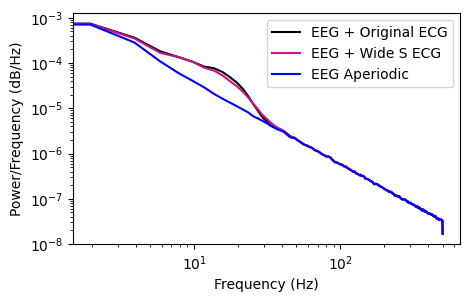

In [ ]:
freq_eeg_only, psd_eeg_only = welch(br_noise, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_original, psd_original = welch(ecg_eeg_original, fs=1000, nperseg=nperseg, noverlap=noverlap)
freq_wide_s, psd_wide_s = welch(ecg_eeg_wide_s, fs=1000, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(5, 3))

# Plot the Power Spectral Density (PSD) in log-log space for both signals
plt.loglog(freq_original, psd_original, label='EEG + Original ECG', color='black' )
plt.loglog(freq_wide_s, psd_wide_s, label='EEG + Wide S ECG', color = 'mediumvioletred')
plt.loglog(freq_eeg_only, psd_eeg_only, label='EEG Aperiodic', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()